Week 10: Neural Nets Regression

5.1 Noisy Lennard-Jones-Gauss data

In [1]:
# create some noise LJ data

def LJ_pot(r,eps=1,sigma=1):
    V = 4*eps*((sigma/r)**12-(sigma/r)**6)
    return V


-0.3203365942785745


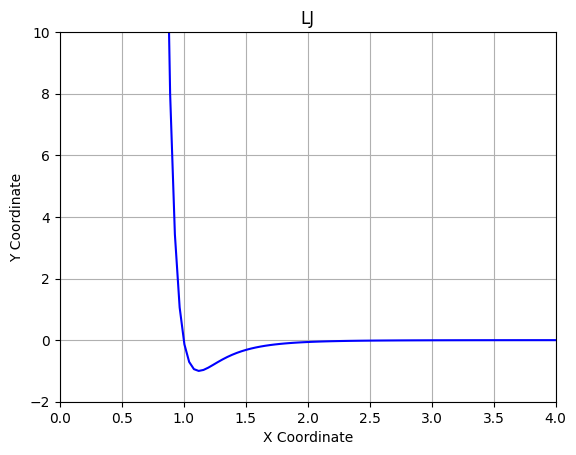

In [2]:
import numpy as np
import matplotlib.pyplot as plt

print(LJ_pot(1.5))
xs = np.linspace(0.2,4,100)
ys = LJ_pot(xs,1,1)

# Plot the original input points
plt.plot(xs, ys, color='blue')

# Labeling the plot
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('LJ')
plt.xlim(0,4)
plt.ylim(-2,10)
plt.grid(True)

# Show the plot
plt.show()

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def noisy_LJ(xs, noise_level, seed=42):
    np.random.seed(seed)
    ys = LJ_pot(xs)
    noise = noise_level * np.random.uniform(-1, 1, size=xs.shape)
    return ys + noise



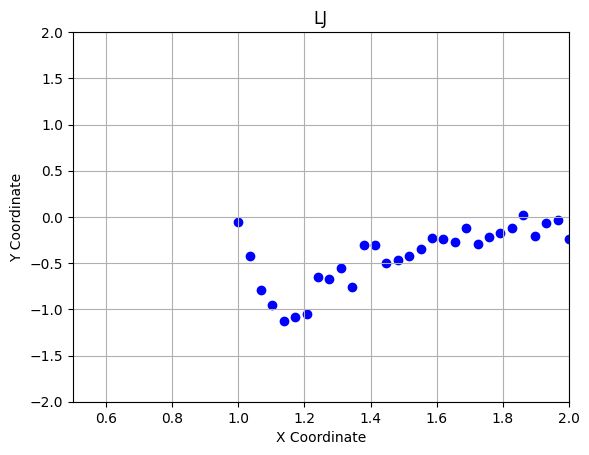

In [25]:


xs = np.linspace(1, 2, 30)
ys = noisy_LJ(xs, 0.2)

# Plot the original input points
plt.scatter(xs, ys, color='blue')

# Labeling the plot
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('LJ')
plt.xlim(0.5, 2)
plt.ylim(-2, 2)
plt.grid(True)

# Show the plot
plt.show()


5.2 Deep neural network fit

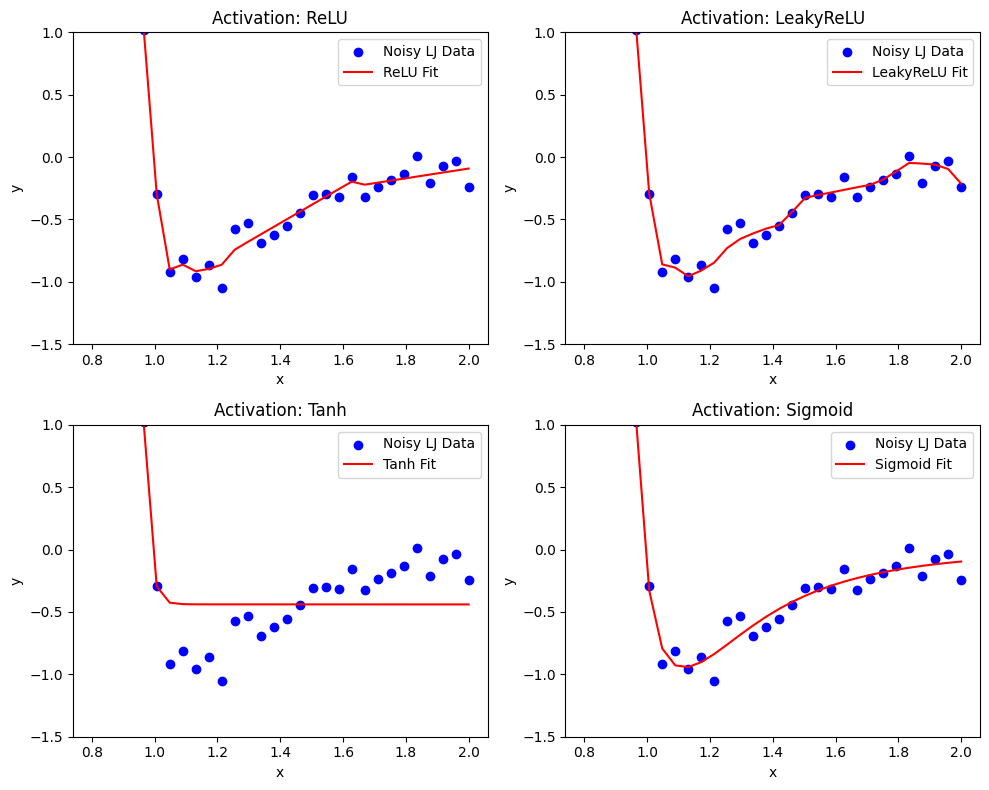

In [40]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Define the Lennard-Jones potential
def LJ_pot(xs):
    return 4 * ((1 / xs) ** 12 - (1 / xs) ** 6)

# Add noise to the LJ potential
def noisy_LJ(xs, noise_level, seed=None):
    if seed is not None:
        np.random.seed(seed)
    ys = LJ_pot(xs)
    noise = noise_level * np.random.uniform(-1, 1, size=xs.shape)
    return ys + noise

class LJNet(nn.Module):
    def __init__(self, layer_sizes, activation_func):
        """
        Initialize a flexible feedforward network.
        
        Args:
        - layer_sizes (list): A list defining the number of neurons in each layer. 
                              For example, [1, 64, 128, 64, 1] defines a network with:
                              - Input layer (1 neuron)
                              - 3 hidden layers with 64, 128, and 64 neurons
                              - Output layer (1 neuron)
        - activation_func (callable): Activation function to use in the network.
        """
        super(LJNet, self).__init__()
        
        self.layers = nn.ModuleList()  # Store layers dynamically
        self.activation = activation_func
        
        # Create linear layers dynamically based on layer_sizes
        for i in range(len(layer_sizes) - 1):
            self.layers.append(nn.Linear(layer_sizes[i], layer_sizes[i + 1]))
    
    def forward(self, x):
        for layer in self.layers[:-1]:  # Apply activation after all but the last layer
            x = self.activation(layer(x))
        x = self.layers[-1](x)  # Linear output for the final layer
        return x


# Training function
def train_model(x_train, y_train, activation_func, architecture, epochs=1000, lr=0.01):
    model = LJNet(architecture, activation_func)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(x_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

    # Get predictions
    model.eval()
    with torch.no_grad():
        predictions = model(x_train).numpy()
    return predictions

# Prepare data
xs = np.linspace(0.8, 2, 30)
ys = noisy_LJ(xs, 0.2, seed=42)
x_train = torch.tensor(xs, dtype=torch.float32).view(-1, 1)
y_train = torch.tensor(ys, dtype=torch.float32).view(-1, 1)

# Define activation functions
activation_functions = {
    "ReLU": nn.ReLU(),
    "LeakyReLU": nn.LeakyReLU(),
    "Tanh": nn.Tanh(),
    "Sigmoid": nn.Sigmoid()
}

architectures = [1, 32, 64, 32, 1],  # Wider network


# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.ravel()

# Train and plot for each activation function
for i, (name, activation_func) in enumerate(activation_functions.items()):
    predictions = train_model(x_train, y_train, activation_func=activation_func, architecture=architectures[0])
    axes[i].scatter(xs, ys, label='Noisy LJ Data', color='blue')
    axes[i].plot(xs, predictions, label=f'{name} Fit', color='red')
    axes[i].set_title(f'Activation: {name}')
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('y')
    axes[i].set_ylim(-1.5, 1)
    axes[i].legend()

plt.tight_layout()
plt.show()

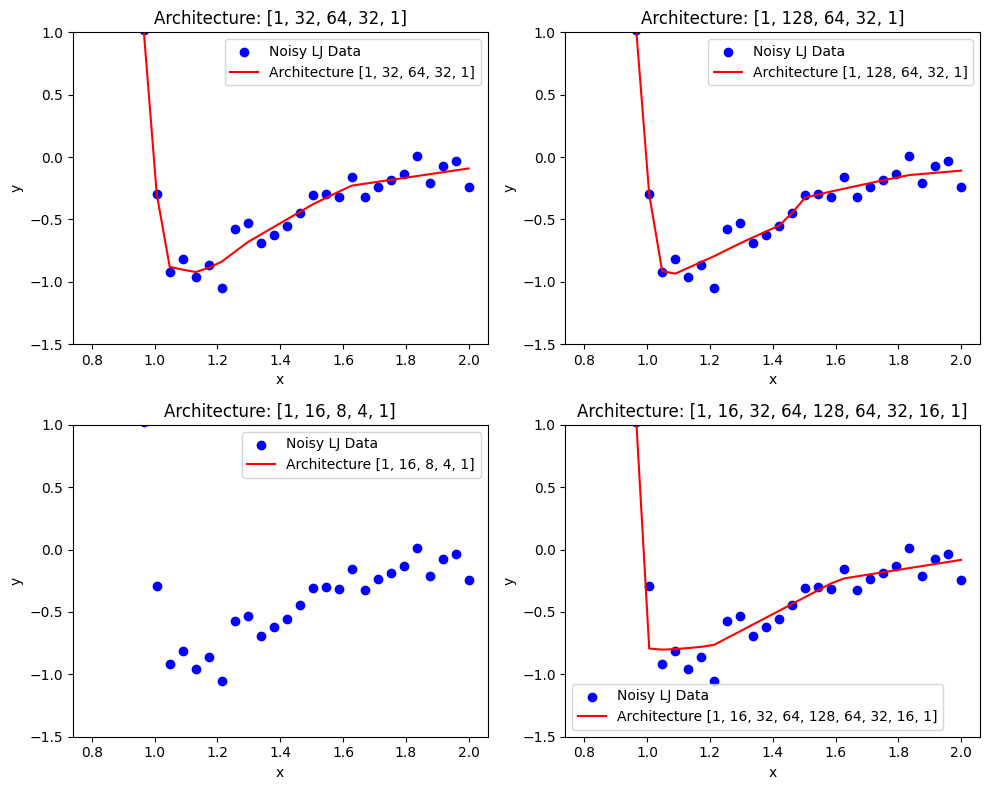

In [ ]:
architectures = [
    [1, 32, 64, 32, 1],  # Wider network
    [1, 128, 64, 32, 1],  # Deeper network
    [1, 16, 8, 4, 1],     # Narrower network
    [1,16,32,64,128,64,32,16,1], 
]

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.ravel()

activation_func = nn.ReLU() 

for i, architecture in enumerate(architectures):  # Use the architectures list directly
    predictions = train_model(x_train, y_train, activation_func=activation_func, architecture=architecture)
    axes[i].scatter(xs, ys, label='Noisy LJ Data', color='blue')
    axes[i].plot(xs, predictions, label=f'Architecture {architecture}', color='red')
    axes[i].set_title(f'Architecture: {architecture}')
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('y')
    axes[i].set_ylim(-1.5, 1)
    axes[i].legend()

plt.tight_layout()
plt.show()


ex 52: 6.1 overfitting

Parameter containing:
tensor(1., requires_grad=True)
Parameter containing:
tensor(0.5000, requires_grad=True)
A = 1.0
b = 0.5
Step 0, Loss: 0.16528348624706268
Step 500, Loss: 0.16371586918830872
Step 1000, Loss: 0.16347432136535645
Step 1500, Loss: 0.16339896619319916
Step 2000, Loss: 0.16337540745735168
Step 2500, Loss: 0.1633680909872055
Step 3000, Loss: 0.16336579620838165
Step 3500, Loss: 0.16336506605148315
Step 4000, Loss: 0.16336482763290405
Step 4500, Loss: 0.16336475312709808
Step 5000, Loss: 0.1633647382259369
Step 5500, Loss: 0.1633647233247757
Step 6000, Loss: 0.1633647233247757
Step 6500, Loss: 0.1633647233247757
Step 7000, Loss: 0.1633647382259369
Step 7500, Loss: 0.1633647382259369
Step 8000, Loss: 0.1633647382259369
Step 8500, Loss: 0.1633647382259369
Step 9000, Loss: 0.1633647382259369
Step 9500, Loss: 0.1633647382259369
A = 1.0285437107086182
b = 0.463765025138855
1 0.5


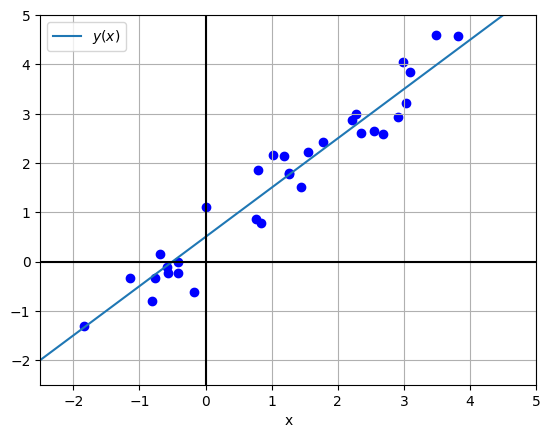

In [66]:
w = 1
b = 0.5
xs_train = torch.rand(32) * 6 - 2
ys_train = w * xs_train + b + 0.5 * torch.randn(32)

class LinModel(torch.nn.Module):
    def __init__(self,A=1, b=1):
        super().__init__()
        self.A = torch.nn.Parameter(torch.tensor(float(A)))
        self.b = torch.nn.Parameter(torch.tensor(float(b)))

    def forward(self, x): # We implement the forward pass
        return self.A * x + self.b
    
A = 1
b = 0.5

model = LinModel(A=A, b=b)
model(1)

for parameter in model.parameters():
    print(parameter)

for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())

steps = 10000

optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

for step in range(steps):
    y_pred = model(xs_train)
    loss = torch.mean((y_pred - ys_train) ** 2)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if step % 500 == 0:
        print(f'Step {step}, Loss: {loss.item()}')

for name, parameter in model.named_parameters():
    print(name, '=', parameter.data.item())  # This prints all parameter names and their values
    if name == 'layers.0.weight':  # Replace with the specific parameter name
        A = parameter.data.item()
    elif name == 'layers.0.bias':  # Replace with another specific parameter name
        b = parameter.data.item()


print(A,b)
def lin_func(x,A,b):
    return A*x+b

# Create a figure and an axes
fig, ax = plt.subplots()
xs = torch.linspace(-10, 10, 100, requires_grad=True)
ys = lin_func(xs,A,b)
yps = torch.autograd.grad(ys, xs, grad_outputs=torch.ones_like(xs))[0]

with torch.no_grad():
    ax.plot(xs, ys, label='$y(x)$')  # No conversion to numpy

ax.set_xlabel("x")
ax.grid(True)
ax.axhline(0, color='k')
ax.axvline(0, color='k')
ax.set_xlim([-2.5, 5])  # Set the y-axis limits
ax.set_ylim([-2.5, 5])  # Set the y-axis limits
ax.legend()

# Plot data points
plt.scatter(xs_train,ys_train, color='blue', label='Data points')

plt.show()  # Display the plot

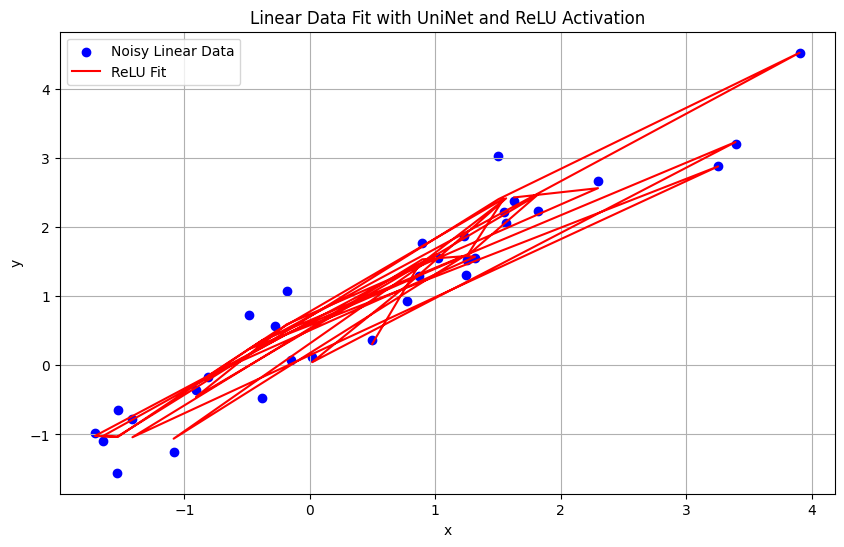

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Generate linear data
w = 1
b = 0.5
xs_train = torch.rand(32) * 6 - 2
ys_train = w * xs_train + b + 0.5 * torch.randn(32)

# Reshape xs_train and ys_train to match the input format for the network
xs_train = xs_train.view(-1, 1)
ys_train = ys_train.view(-1, 1)

# Define the UniNet model
class UniNet(nn.Module):
    def __init__(self, layer_sizes, activation_func):
        super(UniNet, self).__init__()
        self.layers = nn.ModuleList()
        self.activation = activation_func
        
        # Create linear layers based on layer_sizes
        for i in range(len(layer_sizes) - 1):
            self.layers.append(nn.Linear(layer_sizes[i], layer_sizes[i + 1]))
    
    def forward(self, x):
        for layer in self.layers[:-1]:
            x = self.activation(layer(x))
        x = self.layers[-1](x)  # Linear output for the last layer
        return x

# Training function
def train_model(x_train, y_train, activation_func, architecture, epochs=1000, lr=0.01):
    model = UniNet(architecture, activation_func)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(x_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

    # Get predictions
    model.eval()
    with torch.no_grad():
        predictions = model(x_train).numpy()
    return predictions

# Define architecture and activation function
architecture = [1, 8, 8, 8, 1]
activation_func = nn.ReLU()

# Train the model and get predictions
predictions = train_model(xs_train, ys_train, activation_func, architecture)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(xs_train.detach().numpy(), ys_train.detach().numpy(), label='Noisy Linear Data', color='blue')
plt.plot(xs_train.detach().numpy(), predictions, label='ReLU Fit', color='red')
plt.title('Linear Data Fit with UniNet and ReLU Activation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


6.2 Regularization

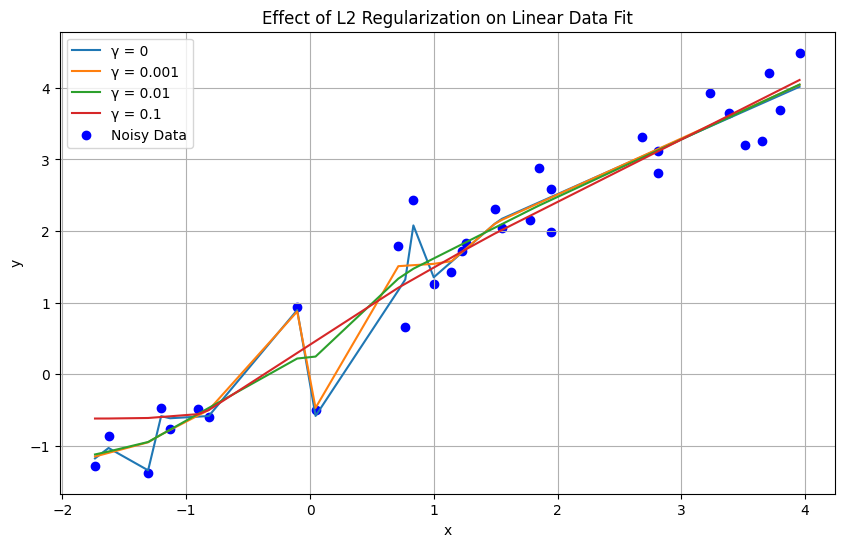

γ = 0 | Average Loss: 0.1361 ± 0.0258
γ = 0.001 | Average Loss: 0.1285 ± 0.0019
γ = 0.01 | Average Loss: 0.1700 ± 0.0038
γ = 0.1 | Average Loss: 0.2048 ± 0.0009


In [74]:
# Training function with L2 regularization
def train_model(x_train, y_train, activation_func, architecture, epochs, lr, gamma, num_runs=5):
    losses = []
    best_model = None
    best_loss = float('inf')
    
    for run in range(num_runs):
        model = UniNet(architecture, activation_func)
        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=gamma)

        for epoch in range(epochs):
            model.train()
            optimizer.zero_grad()
            outputs = model(x_train)
            loss = criterion(outputs, y_train)
            loss.backward()
            optimizer.step()
        
        # Evaluate the model
        final_loss = criterion(model(x_train), y_train).item()
        losses.append(final_loss)
        
        # Save the best model for this regularization level
        if final_loss < best_loss:
            best_loss = final_loss
            best_model = model
    
    return best_model, losses

# Define the hyperparameters
epochs = 1000
learning_rate = 0.01
architecture = [1, 8, 8, 8, 1]
activation_func = nn.ReLU()
gamma_values = [0, 0.001, 0.01, 0.1]  # Different regularization strengths
num_runs = 5  # Number of runs to find the best model

# Train models for each regularization level
results = {}
for gamma in gamma_values:
    best_model, losses = train_model(xs_train, ys_train, activation_func, architecture, epochs, learning_rate, gamma, num_runs)
    results[gamma] = (best_model, losses)

# Plotting the results
plt.figure(figsize=(10, 6))

for gamma, (model, losses) in results.items():
    # Sort xs_train for smooth plotting
    sorted_indices = torch.argsort(xs_train, dim=0).squeeze()
    xs_train_sorted = xs_train[sorted_indices]  # Leave as a tensor
    ys_train_sorted = ys_train[sorted_indices].detach().numpy()

    # Generate predictions
    with torch.no_grad():
        predictions = model(xs_train_sorted).numpy()  # Convert to numpy after getting the predictions

    
    # Plot the predictions
    plt.plot(xs_train_sorted, predictions, label=f'γ = {gamma}')

# Scatter the original noisy data
plt.scatter(xs_train, ys_train, label='Noisy Data', color='blue')
plt.title('Effect of L2 Regularization on Linear Data Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Print average losses for each gamma
for gamma, (_, losses) in results.items():
    print(f'γ = {gamma} | Average Loss: {np.mean(losses):.4f} ± {np.std(losses):.4f}')


ex 53, 7.2: early stopping 

In [76]:
xs_train, ys_train = (
    torch.tensor([-3.5185,  4.7913, -5.7294,  6.8313, -6.1949, -2.8359,  3.5770, -9.7352,
               8.7236, -7.6444, -1.1604, -9.2950, -1.8292, -6.7322, -9.0877,  2.2723,
               2.7528,  5.6493, -5.1721,  7.4619,  2.5825,  6.7389, -3.8990, -5.9992,
              -4.8179, -0.1513,  6.4030, -1.3305, -2.6794, -9.2903, -6.6771,  9.1123,
              -6.6671, -5.1416, -6.7792,  6.6271,  2.0327, -2.4105,  0.2440,  7.1406]),
    torch.tensor([ -5.3765,  -9.0848,   2.1590,  -5.8315,   0.5031,  -3.8388,  -6.5292,
                9.6496,  -1.1439,   5.5176,  -8.8955,   4.3279,  -1.9723,   3.8308,
                6.4774,  -5.0248,  -7.7662,  -3.7932,  -1.8295,  -3.4870,  -6.7717,
               -4.3586,  -1.6717,   0.7881,  -0.4866,  -7.9941,  -8.7333,  -5.5161,
               -4.7155,   8.2325,  -1.7633,   2.4318,   1.8717,   1.8029,   2.2103,
               -4.0772,  -7.6173,  -3.6258, -10.3260,  -4.2308]))
xs_validation, ys_validation = (
    torch.tensor([-9.0973, -8.9917,  5.1596,  9.4471,  8.3714]),
    torch.tensor([ 8.7651,  5.7321, -5.7455, -0.1567, -3.6792]))
xs_test, ys_test = (
    torch.tensor([-9.9859, -1.1808, -3.3172,  7.6878,  7.2361]),
    torch.tensor([ 9.4506, -3.8572, -5.1936, -3.7723, -2.0726]))

7.2 Wrap your data as PyTorch Dataset's and let them be handled by PyTorch DataLoader's. Plot the three datasets with loops like this:

In [81]:
from torch.utils.data import TensorDataset, DataLoader

# Training data
train_dataset = TensorDataset(xs_train.view(-1, 1), ys_train.view(-1, 1))
train_loader = DataLoader(dataset=train_dataset, batch_size=8, shuffle=True)

# Validation data
validation_dataset = TensorDataset(xs_validation.view(-1, 1), ys_validation.view(-1, 1))
validation_loader = DataLoader(dataset=validation_dataset, batch_size=8, shuffle=False)

# Test data
test_dataset = TensorDataset(xs_test.view(-1, 1), ys_test.view(-1, 1))
test_loader = DataLoader(dataset=test_dataset, batch_size=8, shuffle=False)

# Example of iterating over the training data
for batch_features, batch_labels in train_loader:
    print("Features:", batch_features)
    print("Labels:", batch_labels)
    break  # Remove this break to iterate over the entire dataset

Features: tensor([[-6.1949],
        [ 0.2440],
        [-6.7322],
        [-0.1513],
        [-6.7792],
        [ 3.5770],
        [-5.1721],
        [-1.8292]])
Labels: tensor([[  0.5031],
        [-10.3260],
        [  3.8308],
        [ -7.9941],
        [  2.2103],
        [ -6.5292],
        [ -1.8295],
        [ -1.9723]])


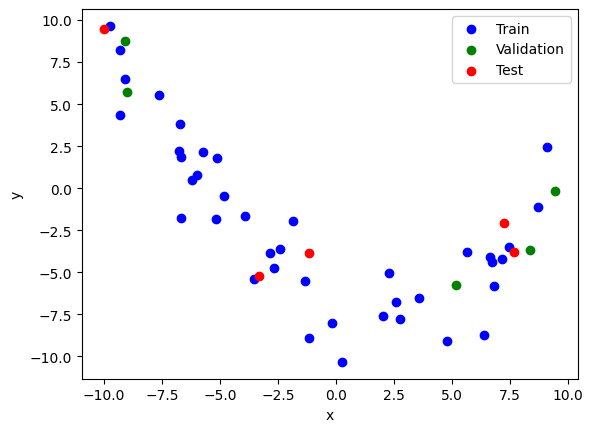

In [82]:
import matplotlib.pyplot as plt

# Set up the plot
fig, ax = plt.subplots()

# Define colors for each dataset
colors = {"train": "blue", "validation": "green", "test": "red"}

# Loop over each DataLoader with assigned colors
for loader, label, color in zip(
    [train_loader, validation_loader, test_loader], 
    ["Train", "Validation", "Test"], 
    [colors["train"], colors["validation"], colors["test"]]
):
    for batch_features, batch_labels in loader:
        ax.scatter(batch_features.numpy(), batch_labels.numpy(), color=color, label=label)

# Remove duplicate labels in legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()
